## Research Questions
The aim of our study is to answer the below research questions:
1. Does price vary with Airlines?
2. How is the price affected when tickets are bought in just 1 or 2 days before departure?
3. Does ticket price change based on the departure time and arrival time?
4. How the price changes with change in Source and Destination?
5. How does the ticket price vary between Economy and Business class?

## Importing Important Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

In [3]:
data = pd.read_csv("clean_dataset.csv")

In [4]:
df = pd.DataFrame(data)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


### Data Exploring

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [6]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

From the information above, we can tell that the dataset is clean NB: Without missing values.


In [7]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


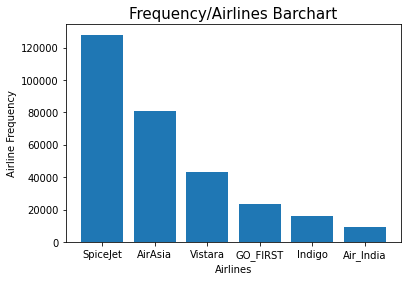

In [52]:
# Ploting graph of airline bookings to visually represent the bookings count.
plt.bar(df.airline.unique(), df.airline.value_counts())
plt.title("Frequency/Airlines Barchart", fontsize=15)
plt.xlabel("Airlines")
plt.ylabel("Airline Frequency")
plt.show()

From the visualization above, it is clear that the SpiceJet and AirAsia are generally preferred by travellers. Could this be due to the price or something else? Lets find out. 

Text(0, 0.5, 'Mean Prices')

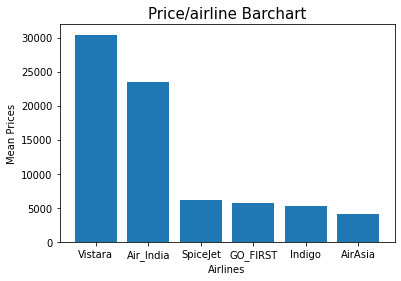

In [51]:
grouped_flight = df.groupby('airline')['price'].mean().sort_values(ascending= False) #Sorted series of airline prices (Grouped by airline)
plt.bar(grouped_flight.index, grouped_flight.values) #plotting mean prices against airline
plt.title("Price/airline Barchart", fontsize=15)
plt.xlabel("Airlines")
plt.ylabel("Mean Prices")

In [55]:
airline_map = {
    'SpiceJet': 1,
    'AirAsia': 2,
    'Vistara': 3,
    'GO_FIRST': 4,
    'Indigo': 5,
    'Air_India': 6    
}
